In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [148]:
data_frame=pd.read_csv("admission_predict.csv") # loading and verifying data
data_frame.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [149]:
print(data_frame.shape) # check the number of rows and columns
data_frame.info()       # no missing values

(400, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [150]:
Independent=data_frame.drop("Chance of Admit",axis=1)
Dependent=data_frame["Chance of Admit"]

In [151]:
Independent.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0


In [152]:
(Dependent)

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit, Length: 400, dtype: float64

In [153]:
#Split the data in train(75%) and test(25%):
X_train, X_test, y_train, y_test = train_test_split(Independent, Dependent, test_size=0.25) # splitting into 300 and 100

In [154]:
model = LinearRegression() # creating a linear regression model

In [155]:
X_GRE=np.array(X_train["GRE Score"]).reshape((-1, 1)) # creating variables to be predicted by a linear regression model
X_CGPA=np.array(X_train["CGPA"]).reshape((-1, 1))

In [156]:
model_GRE=LinearRegression().fit(X_GRE,y_train) # creating a model against each variable
model_CPGA=LinearRegression().fit(X_CGPA,y_train)

In [160]:
y_pred_GRE=model_GRE.predict(np.array(X_test["GRE Score"]).reshape((-1,1))) # predict values using the model
y_pred_CGPA=model_CPGA.predict(np.array(X_test["CGPA"]).reshape((-1,1)))


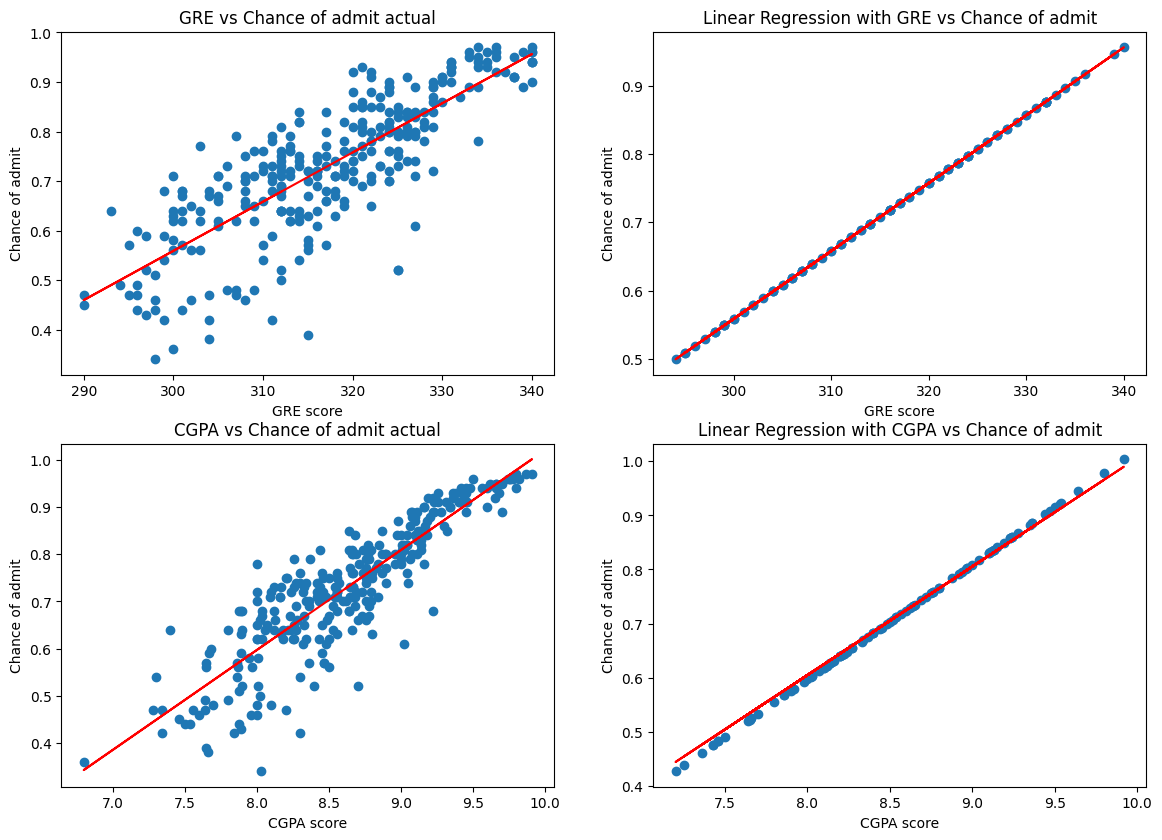

In [164]:
fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 10), dpi=100)

# GRE score actual value plot linear Regression value plots
ax[0,0].scatter(X_GRE,y_train)
ax[0,0].set_title("GRE vs Chance of admit actual")
ax[0,0].set_xlabel('GRE score')
ax[0,0].set_ylabel('Chance of admit')
# Calculating parameters (Here, intercept-theta1 and slope-theta0)
# of the line using the numpy.polyfit() function
theta = np.polyfit(X_train["GRE Score"], y_train, 1)
 # Now, calculating the y-axis values against x-values according to
 # the parameters theta0, theta1 and theta2
y_line = theta[1] + theta[0] * X_GRE
ax[0,0].plot(X_GRE, y_line, 'r')

# linear Regression value plots
ax[0,1].scatter(X_test["GRE Score"],y_pred_GRE)
theta = np.polyfit(X_test["GRE Score"], y_pred_GRE, 1)
ax[0,1].set_title("Linear Regression with GRE vs Chance of admit")
ax[0,1].set_xlabel('GRE score')
ax[0,1].set_ylabel('Chance of admit')
y_line = theta[1] + theta[0] * X_test["GRE Score"]
ax[0,1].plot(X_test["GRE Score"], y_line, 'r')


# CGPA score actual value and linear Regression value plots
ax[1,0].scatter(X_CGPA,y_train)
ax[1,0].set_title("CGPA vs Chance of admit actual")
ax[1,0].set_xlabel('CGPA score')
ax[1,0].set_ylabel('Chance of admit')
# Calculating parameters (Here, intercept-theta1 and slope-theta0)
# of the line using the numpy.polyfit() function
theta = np.polyfit(X_train["CGPA"], y_train, 1)
 # Now, calculating the y-axis values against x-values according to
 # the parameters theta0, theta1 and theta2
y_line = theta[1] + theta[0] * X_train["CGPA"]
ax[1,0].plot(X_CGPA, y_line, 'r')

ax[1,1].scatter(X_test["CGPA"],y_pred_CGPA)
theta = np.polyfit(X_test["CGPA"], y_test, 1)
ax[1,1].set_title("Linear Regression with CGPA vs Chance of admit")
ax[1,1].set_xlabel('CGPA score')
ax[1,1].set_ylabel('Chance of admit')
y_line = theta[1] + theta[0] * X_test["CGPA"]
ax[1,1].plot(X_test["CGPA"], y_line, 'r')

# Extra

In [53]:
def graph(X,y):
    # Calculating parameters (Here, intercept-theta1 and slope-theta0)
    # of the line using the numpy.polyfit() function
    theta = np.polyfit(X, y, 1)

    print(f'The parameters of the line: {theta}')

    # Now, calculating the y-axis values against x-values according to
    # the parameters theta0, theta1 and theta2
    y_line = theta[1] + theta[0] * X

    # Plotting the data points and the best fit line
    plt.scatter(X, y)
    plt.plot(X, y_line, 'r')
    plt.title('Best fit line using numpy.polyfit()')
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')

    plt.show()

The parameters of the line: [[ 0.00985214]
 [-2.40042884]]


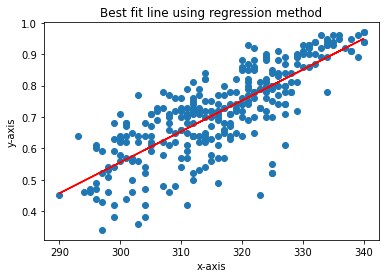

In [72]:
graph(X,y_train)

The parameters of the line: [[ 0.00985214]
 [-2.40042884]]


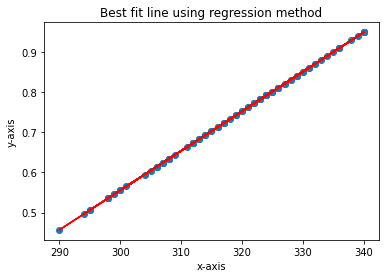

In [74]:
X_test=np.array(X_test["GRE Score"]).reshape((-1, 1))
graph(X_test,y_pred)

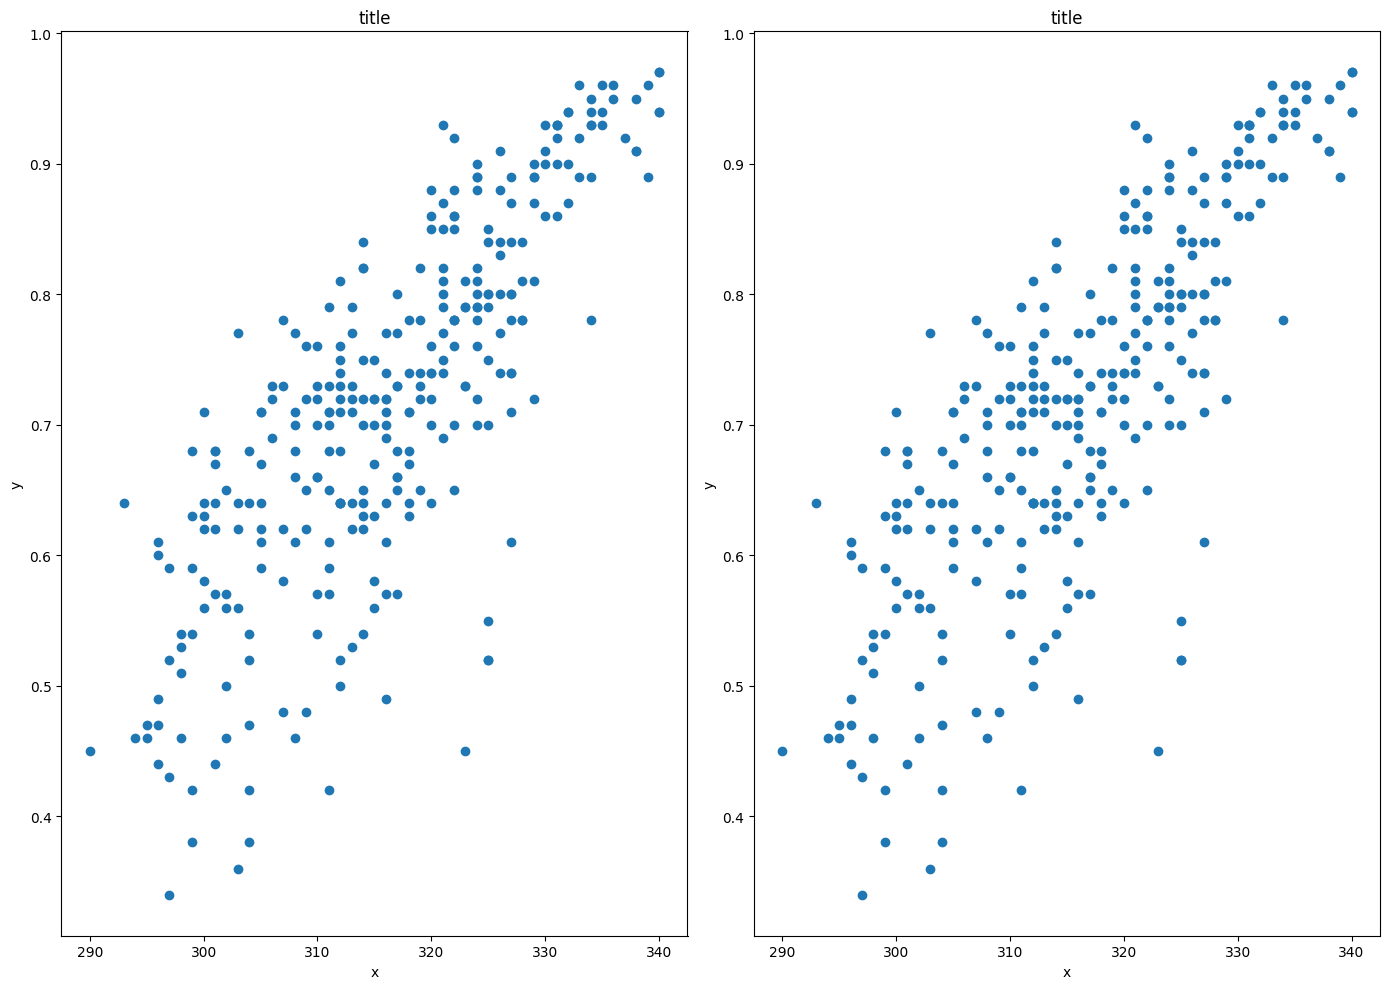

In [92]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(14, 10), dpi=100)

for ax in axes:
    ax.scatter(X, y_train)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')
    
fig.tight_layout()